## КМ3

1) Рассмотрите электрическую схему, состоящую из источника ЭДС (E), резистора $R_{(\textit{1})}$ и нелинейного элемента NE, заданного вольт-амперной характеристикой (ВАХ): $𝑖_{(\textit{𝑁𝐸})}$=$𝑢_{(\textit{𝑁𝐸})}^{\text{3}}$, где $𝑖_{(\textit{𝑁𝐸})}$, $𝑢_{(\textit{𝑁𝐸})}$ – ток и напряжение на нелинейном элементе. Параллельно нелинейному элементу включен резистор $R_{(\textit{2})}$. Таким образом цепь состоит из последовательно подключенных источника ЭДС, резистора $R_{(\textit{1})}$. Цепь замыкают параллельно включенные нелинейный элемент и резистор $R_{(\textit{2})}$. Составьте уравнение цепи относительно напряжения на нелинейном элементе. Напишите функцию для решения этого уравнения любым из доступных Вам методов (см. главу 10 присланного Вам пособия).

2) Постройте зависимости токов на резисторе $R_{(\textit{2})}$ и нелинейном элементе при $R_{(\textit{2})}$=1 Ом и $R_{(\textit{2})}$=0.2 Ом. Постройте их графики в зависимости от времени от 0 до 10.

[0.03511985] [1.63739794] [1.67251779]


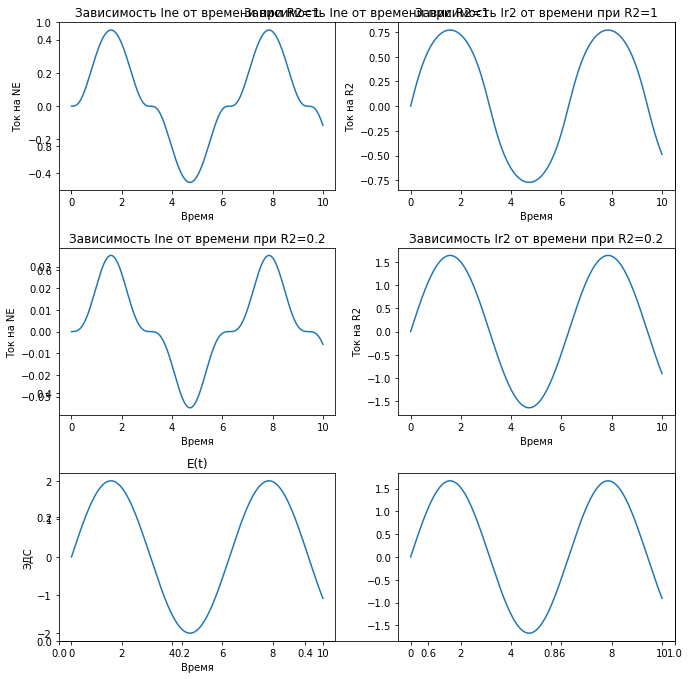

In [6]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt


def vah(Une):
    return Une**3


def E(t, e=2):
    return e*np.sin(t)


def schem(Une, e, r1, r2, vah):
    return e/(r1 + (Une*r2/vah(Une))/(r2 + Une/vah(Une))) - (e-Une)/r1
 

def draw(r1 = 1, r2_1 = 1, r2_2 = 0.2):
    
    t = [i for i in np.linspace(0.001, 10, 1000)]
    Et = [E(tt) for tt in t]
    Une_1 = [fsolve(schem, 0.01, args=(E(tt), r1, r2_1, vah)) for tt in t] #При r2 = 1Ом
    Ine_1 = [vah(u) for u in Une_1]
    Ir2_1 = [une/r2_1 for une in Une_1]

    Une_2 = [fsolve(schem, 0.01, args=(E(tt), r1, r2_2, vah)) for tt in t] #При r2 = 0.2Ом
    Ine_2 = [vah(u) for u in Une_2]
    Ir2_2 = [une/r2_2 for une in Une_2]
    Ir1 = [i+j for i, j in zip(Ine_2, Ir2_2)]
    print(max(Ine_2), max(Ir2_2), max(Ir1))
   
    fig = plt.figure(figsize=(10, 10))
#     plt.subplot(3, 2, 1)
    plt.title ('Зависимость Ine от времени при R2=1')
    ax1 = fig.add_subplot(3, 2, 1)
    ax1.set(title='Зависимость Ine от времени при R2=1')
    ax1.set_xlabel('Время')
    ax1.set_ylabel('Ток на NE')
    ax2 = fig.add_subplot(3, 2, 2)
    ax2.set(title='Зависимость Ir2 от времени при R2=1')
    ax2.set_xlabel('Время')
    ax2.set_ylabel('Ток на R2')
    ax3 = fig.add_subplot(3, 2, 3)
    ax3.set(title='Зависимость Ine от времени при R2=0.2')
    ax3.set_xlabel('Время')
    ax3.set_ylabel('Ток на NE')
    ax4 = fig.add_subplot(3, 2, 4)
    ax4.set(title='Зависимость Ir2 от времени при R2=0.2')
    ax4.set_xlabel('Время')
    ax4.set_ylabel('Ток на R2')
    ax5 = fig.add_subplot(3, 2, 5)
    ax5.set(title='E(t)')
    ax5.set_xlabel('Время')
    ax5.set_ylabel('ЭДС')
    
    ax6 = fig.add_subplot(3, 2, 6)
    
    
    ax1.plot(t, Ine_1)
    ax2.plot(t, Ir2_1)
    ax3.plot(t, Ine_2)
    ax4.plot(t, Ir2_2)
    ax5.plot(t, Et)
    ax6.plot(t, Ir1)
    plt.tight_layout()
    plt.show() 


draw()

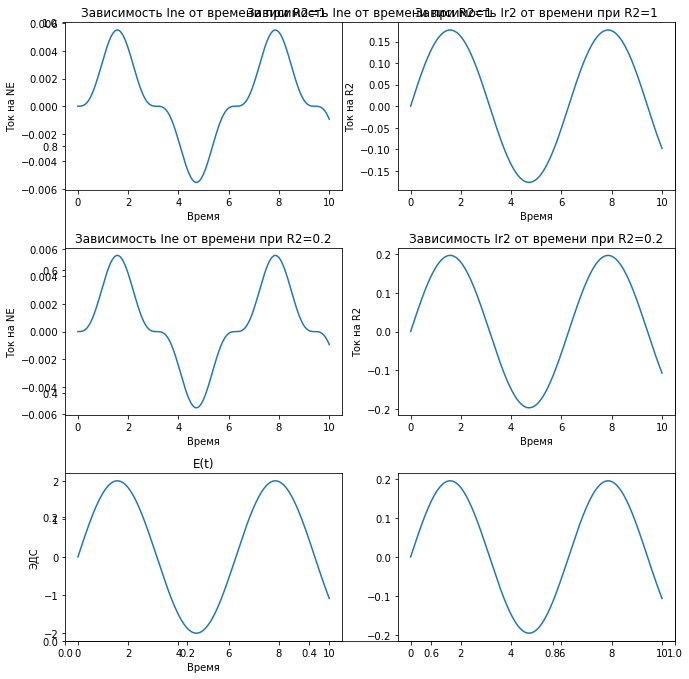

In [3]:
draw(r1=10)

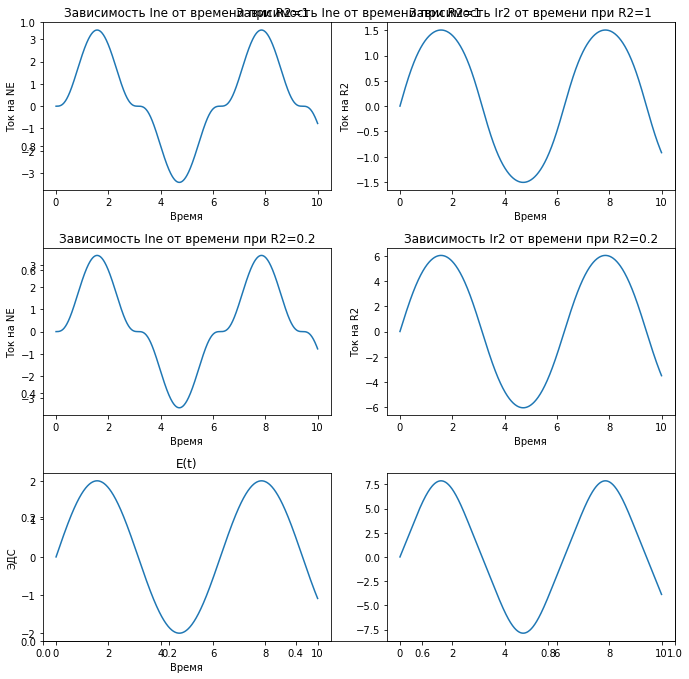

In [4]:
draw(r1=0.1)